# [KDT] ch3 가설 검정

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# 파일 로딩 
df_hk = pd.read_csv('c:ktd_2_data230224/hk_221206.csv')
df_hk.head()


,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015


In [ ]:
# Data type을 살펴보고 EDA를 수행 


## 1 sample t-test

$ H_0 : \mu = \mu_0$

$ H_1 : \mu \neq \mu_0$

In [3]:
# 1 sample t-test
df_hk['age']

0      22
1      31
2      55
3      28
4      29
       ..
245    50
246    51
247    52
248    53
249    54
Name: age, Length: 250, dtype: int64

In [4]:
# t-test를 할 data의 mean
df_hk['age'].mean()

39.24

In [ ]:
# describe


<AxesSubplot:ylabel='Frequency'>

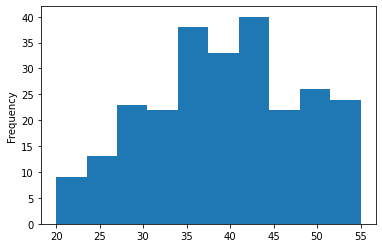

In [6]:
# age의 histogram
df_hk['age'].plot.hist()

In [6]:
# t-test를 할 data의 mean 근처의 값으로 t-test후 t통계량과 p_value 관찰
from scipy.stats import ttest_1samp
ttest_1samp(df_hk['age'], popmean=30)

Ttest_1sampResult(statistic=16.882244149646134, pvalue=3.847271424260211e-43)

In [8]:
# t-test를 할 data의 mean 근처의 값으로 t-test후 t통계량과 p_value 관찰
3.847271424260211e-43 < 0.05

True

In [9]:
# t-test를 할 data의 mean 근처의 값으로 t-test후 t통계량과 p_value 관찰
ttest_1samp(df_hk['age'], popmean=38)

Ttest_1sampResult(statistic=2.265582548220913, pvalue=0.024336341875188777)

In [13]:
# t-test를 할 data의 mean 근처의 값으로 t-test후 t통계량과 p_value 관찰 
ttest_1samp(df_hk['age'], popmean=38.5)[1] <0.05    # 귀무가설 채택, 같다, 95% 신뢰수준에서

False

In [15]:
ttest_1samp(df_hk['age'], popmean=39.24)[1]

1.0

### 2 sample t-test


$ H_0 : \mu_0 = \mu_1$

$ H_1 : \mu_0 \neq \mu_1$

In [19]:
# A,B,C회사 연봉 평균
salary_a = df_hk[df_hk['company'] == 'A'].salary.mean()
salary_b = df_hk[df_hk['company'] == 'B'].salary.mean()
salary_c = df_hk[df_hk['company'] == 'C'].salary.mean()
print(salary_a,salary_b,salary_c)

6522.5 5364.4 8013.6


In [7]:
# 2 sample t-test (A=B)
from scipy.stats import ttest_ind
a = df_hk[df_hk['company'] == 'A'].salary
b = df_hk[df_hk['company'] == 'B'].salary

ttest_ind(a, b)

Ttest_indResult(statistic=5.941362455469809, pvalue=1.2532322871358408e-08)

In [22]:
# 2 sample t-test (A>=B) less
ttest_ind(a, b, alternative='less') # A > B 

Ttest_indResult(statistic=5.941362455469809, pvalue=0.9999999937338386)

In [23]:
# 2 sample t-test (A<=B) greater
ttest_ind(a, b, alternative='greater')

Ttest_indResult(statistic=5.941362455469809, pvalue=6.266161435679204e-09)

-----------------------------------------------------------------------

## Quiz 1

1) iris 데이터를 사용하여('iris.csv') species column 'virginica'의 'sepal_width' 모평균이 3.14와 같은지 가설을 수립하고 
   유의수준 0.05에서 검정하시오

2) 'setosa'와 'versicolor'의 sepal_length 평균이 같은지 가설을 수립하고 유의수준 0.05에서 검정하시오

In [8]:
# 파일 로딩 
df_iris = pd.read_csv("c:ktd_2_data230224/iris.csv")


In [10]:
ttest_1samp(df_iris[df_iris['species'] == 'virginica'].sepal_width, popmean = 3.14)


Ttest_1sampResult(statistic=-3.6397193577606113, pvalue=0.000656333824892921)

In [ ]:
# 가설검정
# H0 : 'virginica'의 'sepal_width' 모평균이 3.14 와 같다고 볼 수 있다 (유의수준 0.05)
# H1 : 'virginica'의 'sepal_width' 모평균이 3.14 와 같다고 볼 수 없다 (유의수준 0.05)

In [11]:
from scipy.stats import ttest_1samp, ttest_ind
ve = df_iris[df_iris['species'] == 'versicolor'].sepal_length
se = df_iris[df_iris['species'] == 'setosa'].sepal_length
ttest_ind(se,ve) #H0 기각

Ttest_indResult(statistic=-10.52098626754911, pvalue=8.985235037487077e-18)

In [ ]:
# 가설검정
# H0 : 'setosa'와 'versicolor' 의 sepal_length 평균이 같다고 볼 수 있다 (유의수준 0.05)
# H1 : 'setosa'와 'versicolor' 의 sepal_length 평균이 같다고 볼 수 없다 (유의수준 0.05)

In [ ]:
from scipy.stats import ttest_1samp, ttest_ind
ve = df_iris[df_iris['species'] == 'versicolor'].sepal_length
se = df_iris[df_iris['species'] == 'setosa'].sepal_length
ttest_ind(se,ve)      

-----------------------------------------------------------------------

## ANOVA

$ H_0 : \mu_1 = \mu_2 = \mu_3$

$ H_1 : \mu_1 \neq \mu_2  \quad or  \quad  \mu_2 \neq \mu_3  \quad   or  \quad  \mu_1 \neq \mu_3$

In [12]:
# A,B,C회사 연봉 평균이 같은지 검정
salary_a = df_hk[df_hk['company'] == 'A'].salary.mean()
salary_b = df_hk[df_hk['company'] == 'B'].salary.mean()
salary_c = df_hk[df_hk['company'] == 'C'].salary.mean()

In [13]:
# ANOVA scipy.stats 사용
from scipy.stats import f_oneway

a = df_hk[df_hk['company'] == 'A'].salary
b = df_hk[df_hk['company'] == 'B'].salary
c = df_hk[df_hk['company'] == 'C'].salary

f_oneway(a,b,c)

F_onewayResult(statistic=48.004778211948, pvalue=2.44205573896896e-18)

In [19]:
# ANOVA statsmodels 사용
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
              #종송변수 equal
model = ols(formula = 'salary ~ company',data=df_hk).fit()
anova_lm(model)

#F_onewayResult(statistic=48.004778211948 = F 48.004778	

,df,sum_sq,mean_sq,F,PR(>F)
company,2.0,238480621.4,1.192403e+08,48.004778,2.442056e-18
Residual,247.0,613529691.0,2.483926e+06,NaN,NaN


<AxesSubplot:xlabel='company', ylabel='salary'>

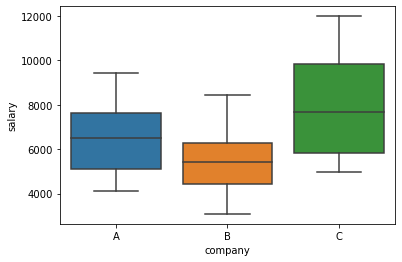

In [23]:
# 시각화 box plot
sns.boxplot(x='company',y='salary', data=df_hk)

In [27]:
# ANOVA 사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(df_hk['salary'],df_hk['company'], alpha=0.05)
print(posthoc)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj   lower      upper   reject
--------------------------------------------------------
     A      B  -1158.1 0.001 -1683.6828 -632.5172   True
     A      C   1491.1 0.001   847.3952 2134.8048   True
     B      C   2649.2 0.001  2005.4952 3292.9048   True
--------------------------------------------------------


In [28]:
# grade별 연봉 평균
# ANOVA scipy.stats 사용
a = df_hk[df_hk['grades'] == 'A'].salary
b = df_hk[df_hk['grades'] == 'B'].salary
c = df_hk[df_hk['grades'] == 'C'].salary
d = df_hk[df_hk['grades'] == 'D'].salary
f = df_hk[df_hk['grades'] == 'F'].salary

f_oneway(a,b,c,d,f) 

F_onewayResult(statistic=0.8236712902602736, pvalue=0.5111463584243117)

In [31]:
# pairwise_tukeyhsd 확인
posthoc = pairwise_tukeyhsd(df_hk['salary'], df_hk['grades'],alpha=0.05)
print(posthoc)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
     A      B   296.6117 0.7824  -446.0139 1039.2374  False
     A      C   240.0277    0.9  -826.7358 1306.7912  False
     A      D   151.5902    0.9 -1244.0821 1547.2625  False
     A      F  -834.2134 0.7574 -2841.8349 1173.4082  False
     B      C   -56.5841    0.9 -1073.1184  959.9503  False
     B      D  -145.0216    0.9 -1502.6882 1212.6451  False
     B      F -1130.8251 0.5163  -3112.214  850.5638  False
     C      D   -88.4375    0.9 -1647.2031 1470.3281  False
     C      F -1074.2411 0.6173 -3198.4806 1049.9984  False
     D      F  -985.8036 0.7391 -3292.8168 1321.2097  False
-----------------------------------------------------------


In [32]:
# ANOVA statsmodels 사용
model = ols(formula = 'salary ~ grades',data=df_hk).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
grades,4.0,1.130554e+07,2.826385e+06,0.823671,0.511146
Residual,245.0,8.407048e+08,3.431448e+06,NaN,NaN


## Quiz 2

1) 'setosa' , 'versicolor', 'virginica'의 sepal_length 평균이 같은지 가설을 수립하고 유의수준 0.05에서 검정하시오

2) bike 데이터(bike.cvs)를 사용하여, 요일별 registered 평균이 같은지 가설을 수립하고 유의수준 0.05에서 검정하시오

3) 평균이 같지 않을때, 평균이 유의수준 0.05에서 차이나지 않는 조합(False)은 몇 개인가 ? 

In [ ]:
# 파일 로딩 


In [ ]:
# 가설검정
# H0 :  'setosa' , 'versicolor', 'virginica'의 'sepal_length' 평균이 같다고 볼 수 있다 (유의수준 0.05)
# H1 :  'setosa' , 'versicolor', 'virginica'의 'sepal_length' 평균이 셋 중 어느 하나는 다르다고 볼 수 있다 (유의수준 0.05)

In [ ]:
# ANOVA scipy.stats 사용


In [ ]:
# ANOVA statsmodels 사용


In [ ]:
# ANOVA 사후검정


## Quiz 3

1) bike 데이터(bike.cvs)를 사용하여, 요일별 registered 평균이 같은지 가설을 수립하고 유의수준 0.05에서 검정하시오

2) 평균이 같지 않을때, 평균이 유의수준 0.05에서 차이나지 않는 조합(False)은 몇 개인가 ? 

In [ ]:
# 파일 로딩 


In [ ]:
# 요일변수 생성


In [ ]:
# ANOVA statsmodels 사용

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


In [ ]:
# ANOVA 사후검정

from statsmodels.stats.multicomp import pairwise_tukeyhsd


## 상관분석

In [33]:
# 파일 로딩
df_hk[:]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015
...,...,...,...,...,...,...,...,...,...,...
245,hkd95,730710-2,F,157.8,50,A,A,A,6990,4865
246,hkd96,720805-2,F,150.4,51,O,A,A,7110,4985
247,hkd97,710929-1,M,172.4,52,A,A,B,8000,6625
248,hkd98,701024-1,M,166.7,53,O,A,B,8760,7385


In [36]:
# Correlation analysis
df_hk.corr()

,height,age,salary,expenditure
height,1.000000,0.040403,0.048673,0.048044
age,0.040403,1.000000,0.525035,0.552832
salary,0.048673,0.525035,1.000000,0.972185
expenditure,0.048044,0.552832,0.972185,1.000000


In [37]:
# pearsonr, spearmanr, kendalltau
from scipy.stats import spearmanr
spearmanr(df_hk['age'],df_hk['salary'])

SpearmanrResult(correlation=0.616262693087095, pvalue=1.539637811022021e-27)

In [39]:
# pearsonr
from scipy.stats import pearsonr
pearsonr(df_hk['age'],df_hk['salary'])

(0.5250345123258027, 4.0964819870216607e-19)

In [ ]:
# spearmanr
from scipy.stats import spearmanr
spearmanr(df_hk['age'],df_hk['salary'])

In [40]:
# kendalltau
from scipy.stats import kendalltau
kendalltau(df_hk['age'],df_hk['salary'])

KendalltauResult(correlation=0.4873172555182334, pvalue=1.1307798230320406e-29)

<AxesSubplot:xlabel='age', ylabel='salary'>

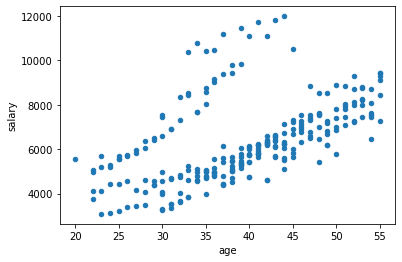

In [41]:
# scatterplot 시각화
df_hk.plot.scatter(x='age',y='salary')

## Quiz 4

bike 데이터(bike.cvs)를 사용하여

1) temp, atemp, humidity, registered의 상관 계수중 가장 높은것은 ?

2) season별로 자전거 총 대여 숫자(count)와의 상관분석을 실시하고 상관 계수가 가장 높은 계절을 구하시오 

3) 날씨가 맑은날(weather = 1) 과 그렇지 않은날 온도(temp)와 자전거 대여 숫자(casual)의 상관계수의 절대값은 얼마인가 ?

In [46]:
# 파일 로딩 
df_bike = pd.read_csv('c:ktd_2_data230224/bike.csv')
df_bike[:20]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [43]:
# 1) temp, atemp, humidity, registered의 상관 계수중 가장 높은것은 ?
df_bike.corr() #temp,atemp

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [45]:
# 2) season별로 atemp와 자전거 대여 숫자(casual)와의 상관분석을 실시하고 상관 계수가 가장 높은 계절을 구하시오
df_bike[['season','atemp','casual']].corr()

,season,atemp,casual
season,1.000000,0.264744,0.096758
atemp,0.264744,1.000000,0.462067
casual,0.096758,0.462067,1.000000


In [ ]:
# 3) 날씨가 맑은날(weather = 1) 과 그렇지 않은날 온도(temp)와 자전거 대여 숫자(casual)의 상관계수의 절대값은 얼마인가 ?


## 카이스퀘어 검정

$H_0:$ 두 변수는 서로 독립임 (연관이 없음)

$H_1:$ 두 변수는 서로 독립이 아님 (연관이 있음)

In [ ]:
# 파일 로딩

In [53]:
# chi-squared test 1, gender company 간의 상관관계 확인
from scipy.stats import chi2_contingency

cross = pd.crosstab(df_hk['gender'],df_hk['company'])


(1.674107142857143,
 0.43298440342651534,
 2,
 array([[44.8, 44.8, 22.4],
        [55.2, 55.2, 27.6]]))

In [54]:
# chi2_contingency
chi2_contingency(cross)

(1.674107142857143,
 0.43298440342651534,
 2,
 array([[44.8, 44.8, 22.4],
        [55.2, 55.2, 27.6]]))

In [57]:
# chi-squared test 2
cross1 = pd.crosstab(df_hk['gender'],df_hk['grades'])
cross1
chi2_contingency(cross1)

(4.3831600833689315,
 0.35662732977015354,
 4,
 array([[35.392, 51.968, 14.336,  7.168,  3.136],
        [43.608, 64.032, 17.664,  8.832,  3.864]]))

## Quiz 5

bike 데이터(bike.cvs)를 사용하여

1) season과 weather dtype을 문자형으로 변환하고 

   두 변수가 관련있는지 적절한 검정을 하고 검정통계량과 p-value를 구하시오  

2) 자전거 총 대여수(count)가 상위 30%일때 'high', 그 미만 일때 'low' 인 파생변수(count_high)를 생성하고
   count_high와 workingday의 독립성 여부를 검정하고 검정 통계량을 구하시오 (소숫점 넷째자리 반올림하여 표기)

In [ ]:
# 파일 로딩 


In [63]:
# 1) season과 weather dtype을 문자형으로 변환하고
#    두 변수가 관련있는지 적절한 검정을 하고 검정통계량과 p-value를 구하시오
df_bike_season = df_bike['season'].astype('str')
df_bike_weather = df_bike['weather'].astype('str')
cross2 =pd.crosstab(df_bike_season,df_bike_weather)
cross2
chi2_contingency(cross2)

(49.158655596893624,
 1.549925073686492e-07,
 9,
 array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

In [72]:
# 2) 자전거 총 대여수(count)가 상위 30%일때 'high', 그 미만 일때 'low' 인 파생변수(count_high)를 생성하고
#    count_high와 workingday의 연관성 여부를 검정하고 검정 통계량을 구하시오 (소숫점 넷째자리 반올림하여 표기)
df_bike['count_high'] = np.where(df_bike['count'] >= df_bike['count'].quantile(0.3), 'high','low')
cross3 = pd.crosstab(df_bike['count_high'],df_bike['workingday'])
chi2_contingency(cross3)

(1.1339080675378113,
 0.2869432736291613,
 1,
 array([[2436.20393166, 5197.79606834],
        [1037.79606834, 2214.20393166]]))

## Quiz 6

<br>교육 전문기관 분석팀에서는 교육 수강자의 정보를 바탕으로 진로설계 프로그램을 운영하기 위해 다음 정보를 수집하였다.
<br>DS_Sample_2.csv (구분자: comma(“,”), 19,158 Rows, 15 Columns, UTF-8 인코딩)

<br>분석을 수행하기 전, 상기 데이터를 이용하여 아래의 전처리를 수행하시오.

<br>단계 1: 분석에 사용하지 않을 city, company_size, company_type 컬럼을 제거하시오.
<br>단계 2: 각 문자형(String Type) 컬럼에 결측치(null/empty space)가 하나라도 존재하는 행(row)은 모두 제거하시오.
<br>단계 3: experience 컬럼의 값이 ‘>20’ 또는 ‘<1’인 값을 제거하고 experience 컬럼의 타입을 정수형(Integer)으로 변환하시오.
<br>단계 4: last_new_job 컬럼의 값이 ‘>4’ 또는 ‘never’인 값을 제거하고 last_new_job컬럼의 타입을 정수형(Integer)으로 변환하시오.

<br>상기 전처리를 완료한 데이터셋(데이터셋명: job2, 7,522 Rows)을 이용하여 다음 문제에 답하시오.

<br>(job2를 이용하여) ‘관련 분야 경험 여부(relevant_experience)’에 따른 ‘이직 희망 여부(target)’를 기술통계량으로 확인하고자 한다.
<br>관련 분야 경험이 없는(relevant_experience=‘No relevant experience’) 수료자 중 이직을 희망(target=’1’)하는 수료자의 비율을 A,
<br>관련 분야 경험이 있는(relevant_experience=’Has relevant experience’) 수료자 중 이직을 희망(target=’1’)하는 수료자의 비율을 B라 할때, A/B를 구하시오.
-	소수점 셋째 자리에서 반올림하여 소수점 둘째 자리까지 기술하시오.
<br>(답안예시) 12.34


In [ ]:
# 파일 로딩


In [ ]:
# 단계 1: 분석에 사용하지 않을 city, company_size, company_type 컬럼을 제거하시오


In [ ]:
# 단계 2: 각 문자형(String Type) 컬럼에 결측치(null/empty space)가 하나라도 존재하는 행(row)은 모두 제거하시오.


In [ ]:
# 단계 3: experience 컬럼의 값이 ‘>20’ 또는 ‘<1’인 값을 제거하고 experience 컬럼의 타입을 정수형(Integer)으로 변환하시오.


In [ ]:
# 단계 4: last_new_job 컬럼의 값이 ‘>4’ 또는 ‘never’인 값을 제거하고 last_new_job컬럼의 타입을 정수형(Integer)으로 변환하시오.


In [ ]:
# No relevant experience 중 target = 1 을 A,
# Has relevant experience 중 target = 1 을 B라 할때, A/B를 구하시오
